In [1]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)

# **Data Loading and Preprocessing**

In [3]:
# defining dataframe
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stock_LSTM/FINAL_FROM_DF.csv')

In [4]:
#Checking the dataframe
stock.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYMBOL       846404 non-null  object 
 1   SERIES       843947 non-null  object 
 2   OPEN         846404 non-null  float64
 3   HIGH         846404 non-null  float64
 4   LOW          846404 non-null  float64
 5   CLOSE        846404 non-null  float64
 6   LAST         846404 non-null  float64
 7   PREVCLOSE    846404 non-null  float64
 8   TOTTRDQTY    846404 non-null  int64  
 9   TOTTRDVAL    846404 non-null  float64
 10  TIMESTAMP    846404 non-null  object 
 11  TOTALTRADES  846404 non-null  int64  
 12  ISIN         846404 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 83.9+ MB


In [6]:
stock.describe()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
count,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,846404.000000,8.464040e+05,8.464040e+05,8.464040e+05
mean,561.258797,568.679340,553.861861,560.815168,560.184430,560.225320,6.983800e+05,1.334592e+08,5.013823e+03
std,2005.760598,2027.159199,1983.412783,2004.576315,2003.900793,2000.362761,4.055630e+06,6.296968e+08,1.490112e+04
min,0.050000,0.050000,0.050000,0.050000,0.000000,0.050000,1.000000e+00,5.000000e-02,1.000000e+00
25%,39.900000,40.850000,38.850000,39.750000,39.600000,39.700000,6.628000e+03,6.071941e+05,8.400000e+01
50%,139.200000,142.050000,136.150000,138.900000,138.450000,138.750000,4.429200e+04,5.321067e+06,6.000000e+02
75%,490.000000,499.550000,481.100000,489.550000,488.500000,489.150000,2.757322e+05,3.711093e+07,3.028000e+03
max,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,119990.000000,7.818365e+08,1.426400e+11,1.192900e+06


In [7]:
# converting Timestamp column in date-time format
stock['TIMESTAMP'] = pd.to_datetime(stock['TIMESTAMP'])

In [8]:
# checking for null values
stock.isnull().sum()

,0
SYMBOL,0
SERIES,2457
OPEN,0
HIGH,0
LOW,0
CLOSE,0
LAST,0
PREVCLOSE,0
TOTTRDQTY,0
TOTTRDVAL,0


In [9]:
stock['SYMBOL'].value_counts()

,count
SYMBOL,
SRTRANSFIN,4709
IDFCBANK,4379
IRFC,4362
NHAI,3360
RECLTD,2919
...,...
M17RD,1
CP7RG,1
IPRU2814,1


In [11]:
stock['SERIES'].value_counts()

,count
SERIES,
EQ,739199
BE,37428
SM,11229
N6,5080
N2,4828
...,...
HB,7
H6,7
HE,1


In [12]:
# picking up one of maximum value_count stock for good training data
irfc = stock[(stock['SYMBOL'] == 'IRFC') ]

In [13]:
irfc.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
709,IRFC,N1,1134.50,1135.0,1134.00,1135.00,1135.00,1133.58,200,226916.50,2017-06-28,8,INE053F07520
710,IRFC,N2,1190.08,1198.0,1190.00,1196.30,1198.00,1199.91,5662,6743402.51,2017-06-28,23,INE053F07538
711,IRFC,N3,1090.00,1090.0,1085.99,1086.66,1085.99,1090.00,15,16299.90,2017-06-28,7,INE053F07561
712,IRFC,N9,1197.70,1198.0,1197.70,1198.00,1198.00,1189.89,20,23957.00,2017-06-28,3,INE053F07678
713,IRFC,ND,1175.00,1175.0,1175.00,1175.00,1175.00,1175.00,100,117500.00,2017-06-28,4,INE053F07736


In [14]:
# checking null values in picked stock dataframe
irfc.isnull().sum()

,0
SYMBOL,0
SERIES,396
OPEN,0
HIGH,0
LOW,0
CLOSE,0
LAST,0
PREVCLOSE,0
TOTTRDQTY,0
TOTTRDVAL,0


In [15]:
# sorting the data by date for better use
irfc = irfc.sort_values(by='TIMESTAMP', ascending=True)

In [16]:
# Drop least important features
irfc = irfc.drop(['SERIES', 'ISIN','SYMBOL'], axis=1)

In [17]:
# set date as index
irfc.set_index('TIMESTAMP', inplace=True)

In [18]:
irfc.corr()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
OPEN,1.000000,0.964761,0.984655,0.963020,0.960704,0.926539,-0.054645,-0.052634,-0.094431
HIGH,0.964761,1.000000,0.950972,0.979861,0.978152,0.923724,-0.053504,-0.051441,-0.090283
LOW,0.984655,0.950972,1.000000,0.971394,0.971512,0.928574,-0.054566,-0.052543,-0.098708
CLOSE,0.963020,0.979861,0.971394,1.000000,0.999032,0.930516,-0.053880,-0.051816,-0.094952
LAST,0.960704,0.978152,0.971512,0.999032,1.000000,0.930119,-0.053534,-0.051454,-0.094441
PREVCLOSE,0.926539,0.923724,0.928574,0.930516,0.930119,1.000000,-0.056086,-0.053593,-0.099727
TOTTRDQTY,-0.054645,-0.053504,-0.054566,-0.053880,-0.053534,-0.056086,1.000000,0.999761,0.943069
TOTTRDVAL,-0.052634,-0.051441,-0.052543,-0.051816,-0.051454,-0.053593,0.999761,1.000000,0.940782
TOTALTRADES,-0.094431,-0.090283,-0.098708,-0.094952,-0.094441,-0.099727,0.943069,0.940782,1.000000


# **EDA**

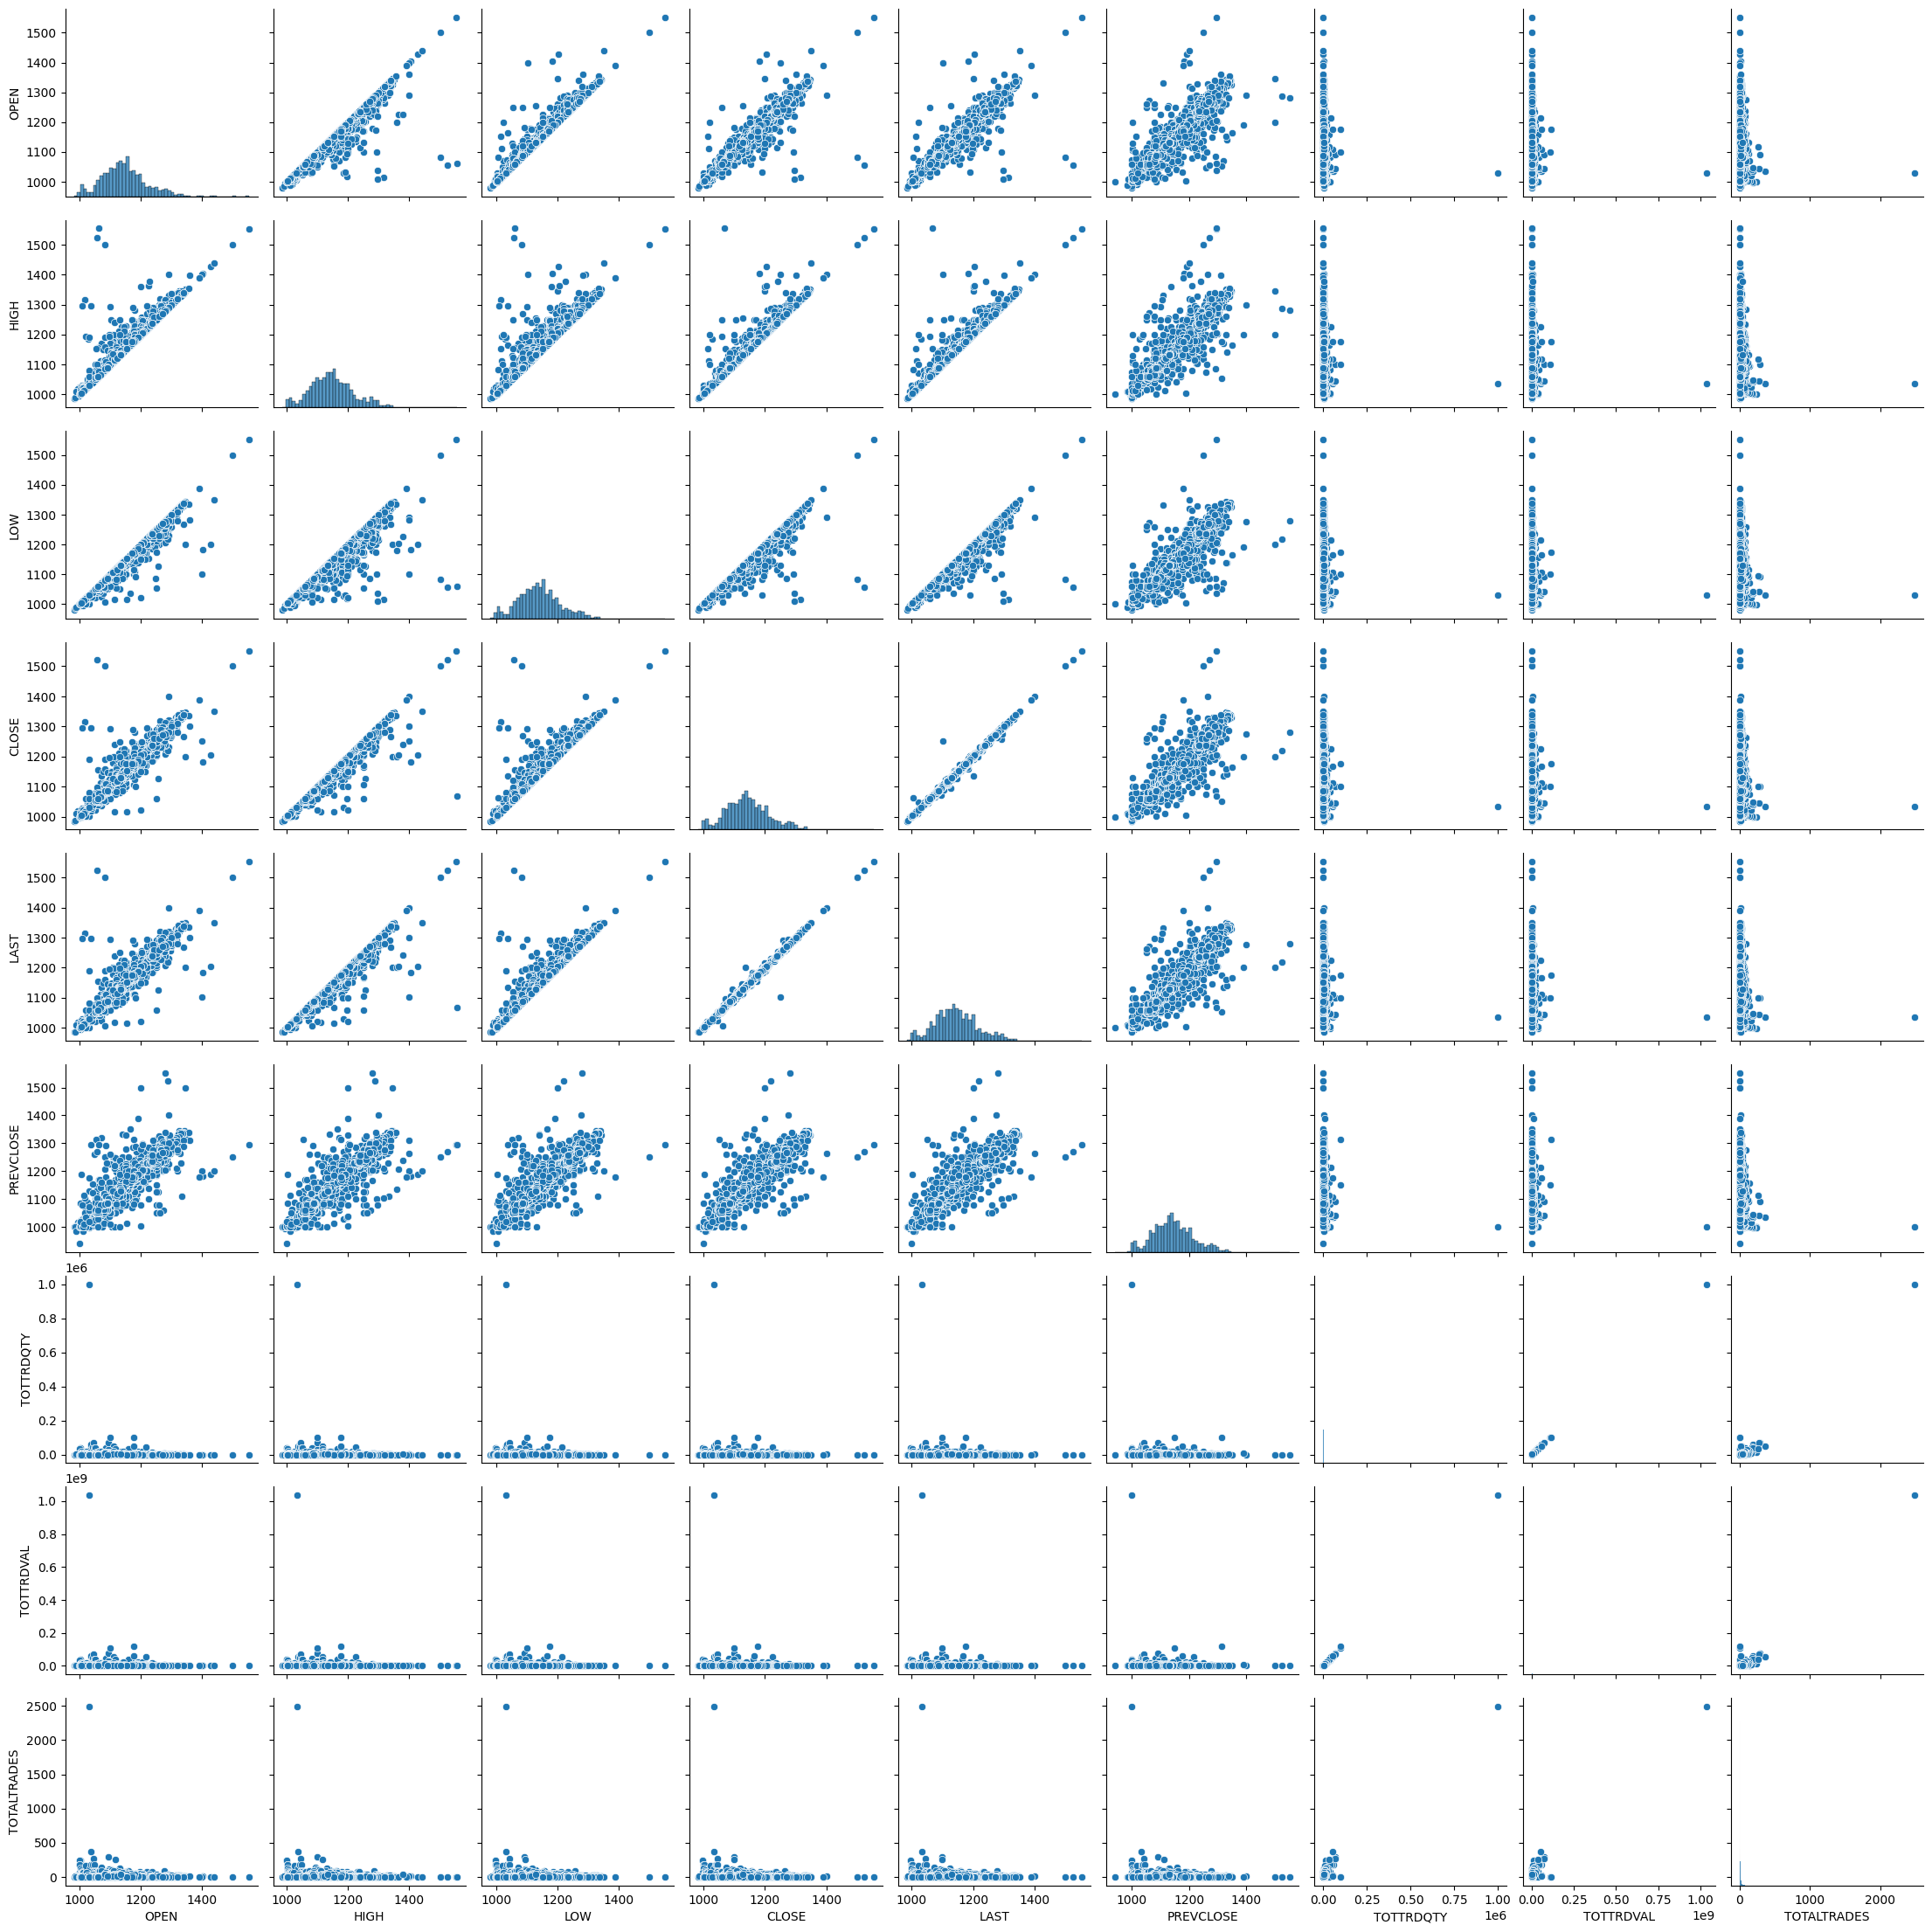

In [19]:
# lets plot pairplot for better understanding
import seaborn as sns

sns.pairplot(irfc)
plt.show()

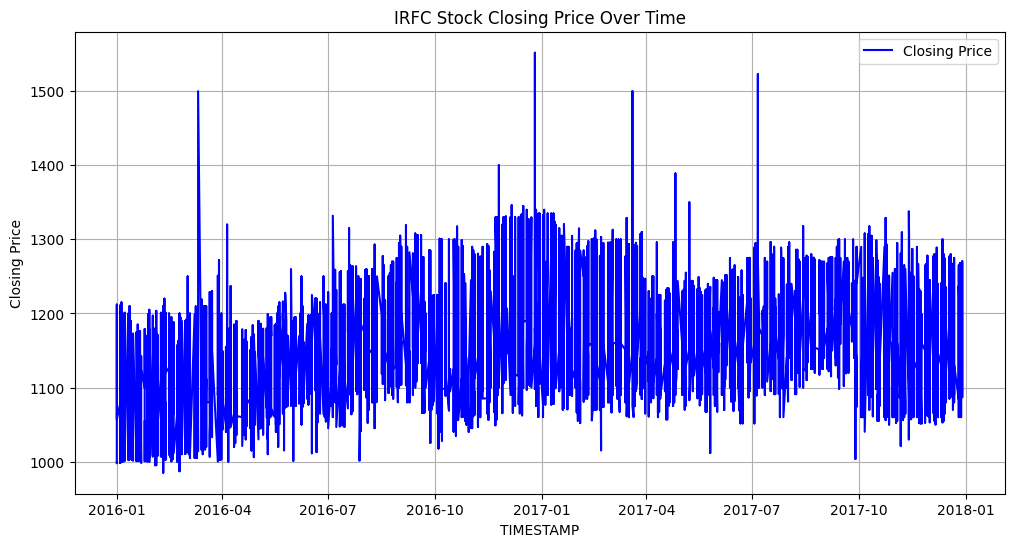

In [20]:
import matplotlib.pyplot as plt

# Plot the stock's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(irfc.index, irfc['CLOSE'], label='Closing Price', color='blue')
plt.title("IRFC Stock Closing Price Over Time")
plt.xlabel("TIMESTAMP")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Correlation matrix
correlation_matrix = irfc.corr()

# Display correlation of each feature with CLOSE
print(correlation_matrix['CLOSE'].sort_values(ascending=False))


CLOSE          1.000000
LAST           0.999032
HIGH           0.979861
LOW            0.971394
OPEN           0.963020
PREVCLOSE      0.930516
TOTTRDVAL     -0.051816
TOTTRDQTY     -0.053880
TOTALTRADES   -0.094952
Name: CLOSE, dtype: float64


- From above data and pairplot we can see weak features.
- lets drop weak features

# **Feature Engineering**
- Normalization
- Standardization
- Splitting data into training and test

In [22]:
# dropping weak features
irfc = irfc.drop(['TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES', 'LAST'], axis=1)

In [23]:
print('Remaining features')
print(irfc.columns)

Remaining features
Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'PREVCLOSE'], dtype='object')


In [24]:
irfc=irfc[['CLOSE','OPEN','HIGH','LOW','PREVCLOSE']]

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# filling null data using ffill method
irfc = irfc.fillna(method='ffill')
train_size = int(len(irfc) * 0.8)
train_data = irfc['CLOSE'][:train_size].values
test_data = irfc['CLOSE'][train_size:].values
# Normalizing data using minmax scalar
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data.reshape(-1, 1))
scaled_test = scaler.transform(test_data.reshape(-1, 1))

<ipython-input-25-4fdd6eea6c27>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  irfc = irfc.fillna(method='ffill')


In [26]:
# Create sequences for train data
look_back = 60
X_train, y_train = [], []
for i in range(look_back, len(scaled_train)):
    X_train.append(scaled_train[i - look_back:i, 0])
    y_train.append(scaled_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
# Create sequences for test data
X_test, y_test = [], []
for i in range(look_back, len(scaled_test)):
    X_test.append(scaled_test[i - look_back:i, 0])
    y_test.append(scaled_test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [28]:
# Reshaping X for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# **Model Selection and Model Building**
- Using LSTM Model

In [29]:
# Build the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import HeNormal

# Initialize the model
model = Sequential()
# Add the first LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=False,
               input_shape=(X_train.shape[1], 1),
               kernel_initializer=HeNormal()))
# Add dropout to prevent overfitting
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Fitting the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0529 - val_loss: 0.0125
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0177 - val_loss: 0.0121
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0153 - val_loss: 0.0121
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0141 - val_loss: 0.0121
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0136 - val_loss: 0.0120
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0132 - val_loss: 0.0122
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 9/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0132 - val_loss: 0.0121
Epoch 10/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 11/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 12/50
215/215 ━━━━━━━━━━━━━━━━━

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


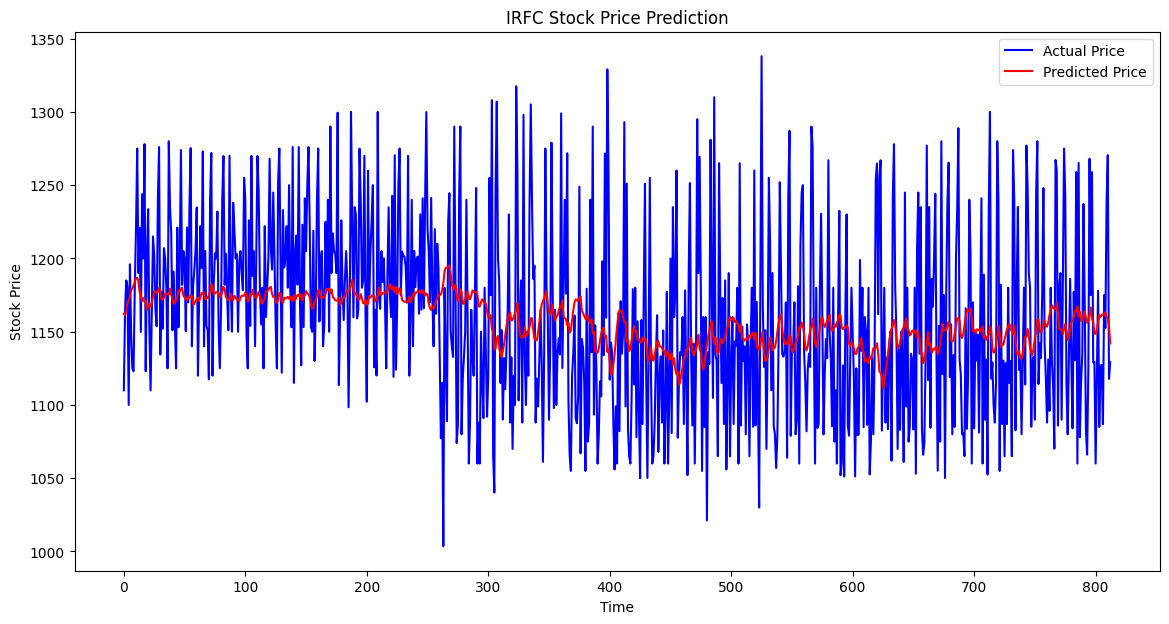

RMSE: 61.8351031564864
MAE: 49.820538166416824


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#Prediction on the test data
predicted_price = model.predict(X_test)

# Inverse the scaling to get the actual price
predicted_price = scaler.inverse_transform(predicted_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predicted_price, color='red', label='Predicted Price')
plt.title('IRFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate RMSE and MAE for evaluation
rmse = math.sqrt(mean_squared_error(y_test_actual, predicted_price))
mae = mean_absolute_error(y_test_actual, predicted_price)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

In [34]:
from sklearn.metrics import r2_score
# Predict on the training data
train_predicted_price = model.predict(X_train)
train_predicted_price = scaler.inverse_transform(train_predicted_price)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))


# Calculate R² score for train data
train_r2 = r2_score(y_train_actual, train_predicted_price)

# Calculate R² score for test data
test_r2 = r2_score(y_test_actual, predicted_price)

# Print R² scores
print(f"R² score for Training Data: {train_r2}")
print(f"R² score for Test Data: {test_r2}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
R² score for Training Data: 0.2101417176492011
R² score for Test Data: 0.09082406726842429


In [35]:


# Get the last 60 days from the training data (or test data)
last_days = 60
data_input = irfc[-last_days:].copy()  # Use the last 60 rows as input

# Scale the input data for prediction
scaled_input = scaler.transform(data_input[['CLOSE']])

# Reshape for LSTM model
X_input = scaled_input.reshape((1, last_days, 1))

# Predict next 30 days
predicted_prices = []
for _ in range(30):
    # Make prediction
    predicted_price = model.predict(X_input)

    # Append the predicted price
    predicted_prices.append(predicted_price[0, 0])

    # Update the input for the next prediction by appending the predicted price
    scaled_input = np.append(scaled_input[1:], predicted_price).reshape((last_days, 1))
    X_input = scaled_input.reshape((1, last_days, 1))

# Inverse transform to get actual predicted prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create a DataFrame for future predictions
predicted_dates = pd.date_range(start=irfc.index[-1], periods=31, freq='B')[1:]  # Next 30 business days
predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Price'], index=predicted_dates)

# Display the predicted values for the next 30 days
print(predicted_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

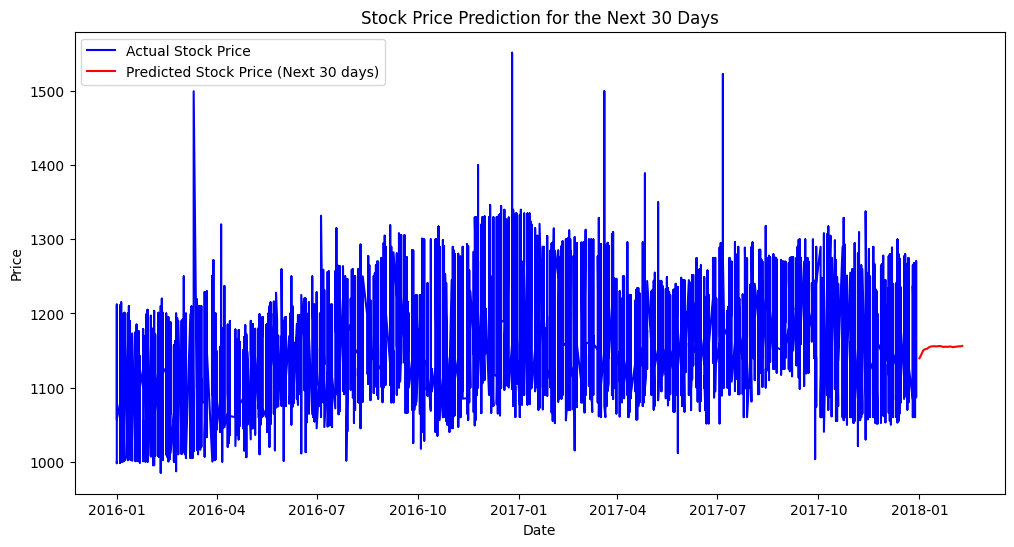

In [36]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(irfc.index, irfc['CLOSE'], color='blue', label='Actual Stock Price')
plt.plot(predicted_df.index, predicted_df['Predicted Price'], color='red', label='Predicted Stock Price (Next 30 days)')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()